In [64]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

In [65]:
tf.enable_eager_execution()

In [66]:
tf.executing_eagerly()

True

In [67]:
x= [[2.]]
n = tf.matmul(x,x)
print(n)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


In [68]:
# Khi thao tác vs eager mode chúng ta k cần khởi tạo section hay graph
n.numpy()

array([[4.]], dtype=float32)

In [69]:
print(x)

[[2.0]]


# Eager Mode - linear regression

In [70]:
import numpy as np
X_data = np.random.random((10000, 2))

sample_weight = np.array([[3.,4.]])
y_data = np.matmul(X_data, sample_weight.transpose())
y_data = np.add(y_data, np.random.uniform(-0.5,0.5))

In [71]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [72]:
tfe = tf.contrib.eager

In [73]:
# Khai báo biến
W = tfe.Variable([[1.0, 1.0]])
b = tfe.Variable(np.random.uniform(-0.2, 0.2))

In [74]:
# Linear Regression
def predict(inputs):
    return tf.matmul(inputs, W, transpose_b=True)

# Loss function
# label là các giá trị của biến y
def loss_func(model_fn, inputs, labels):
    return tf.reduce_mean(tf.square(model_fn(inputs) - labels))

In [77]:
# Parameters

learning_rate = 0.001
num_steps = 10000

# Optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# caculate gradient
grad = tfe.implicit_gradients(loss_func)

In [87]:
# training model

for i in range(num_steps):
    optimizer.apply_gradients(grad(predict, np.float32(X_train), np.float32(y_train)))
    if i % 100 == 0:
        train_loss = loss_func(predict, np.float32(X_train), np.float32(y_train))
        test_loss = loss_func(predict, np.float32(X_test), np.float32(y_test))
        
        print(train_loss, test_loss)

tf.Tensor(0.006300584, shape=(), dtype=float32) tf.Tensor(0.006444829, shape=(), dtype=float32)
tf.Tensor(0.0062881894, shape=(), dtype=float32) tf.Tensor(0.0064334758, shape=(), dtype=float32)
tf.Tensor(0.0062762033, shape=(), dtype=float32) tf.Tensor(0.006422507, shape=(), dtype=float32)
tf.Tensor(0.006264581, shape=(), dtype=float32) tf.Tensor(0.0064118756, shape=(), dtype=float32)
tf.Tensor(0.0062534, shape=(), dtype=float32) tf.Tensor(0.0064016543, shape=(), dtype=float32)
tf.Tensor(0.00624251, shape=(), dtype=float32) tf.Tensor(0.0063917045, shape=(), dtype=float32)
tf.Tensor(0.0062320656, shape=(), dtype=float32) tf.Tensor(0.00638217, shape=(), dtype=float32)
tf.Tensor(0.0062218797, shape=(), dtype=float32) tf.Tensor(0.0063728667, shape=(), dtype=float32)
tf.Tensor(0.0062121176, shape=(), dtype=float32) tf.Tensor(0.006363968, shape=(), dtype=float32)
tf.Tensor(0.0062025967, shape=(), dtype=float32) tf.Tensor(0.006355283, shape=(), dtype=float32)
tf.Tensor(0.006193462, shape=(), 

tf.Tensor(0.005945789, shape=(), dtype=float32) tf.Tensor(0.0061260224, shape=(), dtype=float32)
tf.Tensor(0.00594508, shape=(), dtype=float32) tf.Tensor(0.006125435, shape=(), dtype=float32)
tf.Tensor(0.005944382, shape=(), dtype=float32) tf.Tensor(0.0061248625, shape=(), dtype=float32)
tf.Tensor(0.005943713, shape=(), dtype=float32) tf.Tensor(0.0061243223, shape=(), dtype=float32)
tf.Tensor(0.0059431256, shape=(), dtype=float32) tf.Tensor(0.006123839, shape=(), dtype=float32)
tf.Tensor(0.0059425402, shape=(), dtype=float32) tf.Tensor(0.0061233616, shape=(), dtype=float32)
tf.Tensor(0.0059419707, shape=(), dtype=float32) tf.Tensor(0.006122894, shape=(), dtype=float32)
tf.Tensor(0.005941408, shape=(), dtype=float32) tf.Tensor(0.0061224382, shape=(), dtype=float32)
tf.Tensor(0.0059408536, shape=(), dtype=float32) tf.Tensor(0.0061219884, shape=(), dtype=float32)
tf.Tensor(0.005940312, shape=(), dtype=float32) tf.Tensor(0.0061215516, shape=(), dtype=float32)
tf.Tensor(0.0059397775, shape=

In [88]:
W.numpy()

array([[2.8340738, 3.8167686]], dtype=float32)

In [89]:
b.numpy()

0.09623385

In [90]:
y_pred = predict(np.float32(X_test))

In [91]:
y_pred

<tf.Tensor: id=677768, shape=(2000, 1), dtype=float32, numpy=
array([[4.901043 ],
       [2.6913328],
       [2.8022485],
       ...,
       [3.6694264],
       [4.142091 ],
       [1.4289618]], dtype=float32)>

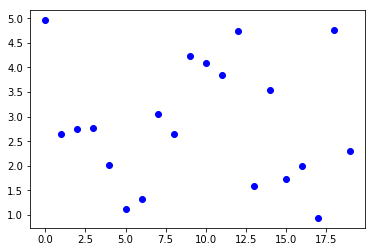

In [92]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_test[:20])), y_test[:20], 'bo')

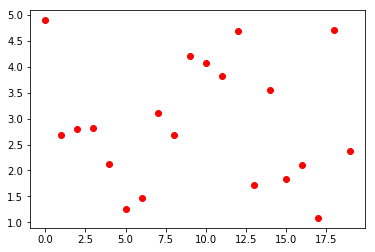

In [94]:
plt.plot(range(len(y_pred.numpy()[:20])), y_pred.numpy()[:20], 'ro')